## Script to reproject the HRAP gridcell centers

**geographic projection for HRAP grid:**

'+proj=longlat +a=6371200 +b=6371200 +no_defs' 

**WGS 84 projection**

'+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs'

** Stereographic projection for the data from online**

'+proj=stere +lat_0=90 +lat_ts=60 +lon_0=-105 +k=1 +x_0=0 +y_0=0 +a=6371200 +b=6371200 +to_meter=4762.5 +no_defs'

I think this compresses the data too much, but if I remove the to_meter part of the argument then the dataset is spread out but the grid cells are not regular...


Theodore Barnhart | tbarnhart@usgs.gov | August 28, 2017

In [1]:
from pyproj import Proj,transform

In [2]:
header = ['cell','num','lat','lon']

In [3]:
dat = pd.read_table('./data/hrap_lat_lon.txt',delim_whitespace=True,header=None, names=header)

In [4]:
lats = dat.lat.as_matrix()
lons = dat.lon.as_matrix()
cells = dat.cell.as_matrix()

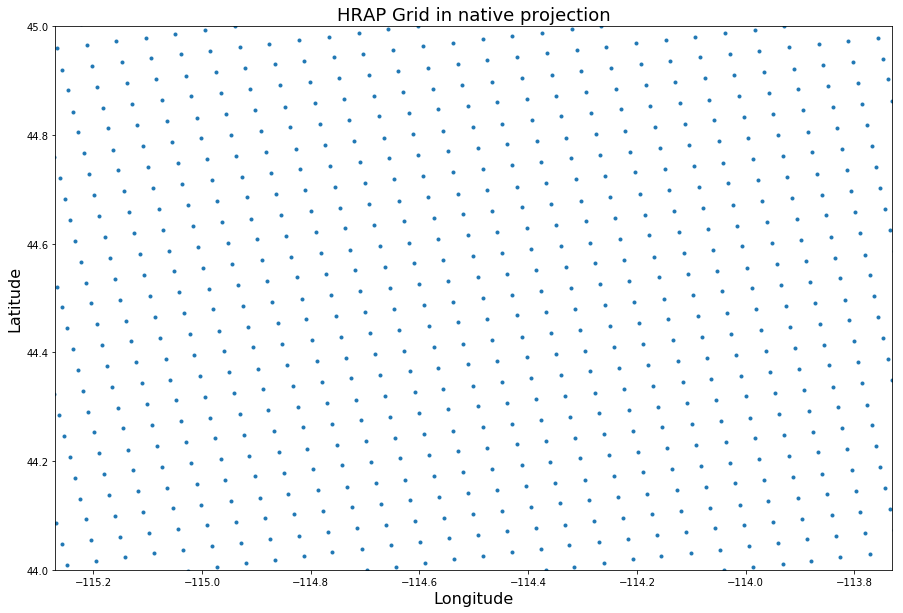

In [5]:
plt.figure(figsize=(15,10))
plt.plot(lons,lats,'.',label='HRAP')
plt.axis('equal')
plt.xlim(-115,-114)
plt.ylim(44,45)
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('HRAP Grid in native projection', fontsize = 18)

## Reproject into WGS84

In [6]:
p1 = Proj('+proj=longlat +a=6371200 +b=6371200 +no_defs',preserve_units=True) # geographic projection for HRAP grid
p2 = Proj('+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs',preserve_units=True) # WGS84 geographic projection

In [7]:
lonsWGS84,latsWGS84 = transform(p1,p2,lons,lats) # reproject the HRAP grid to WGS84

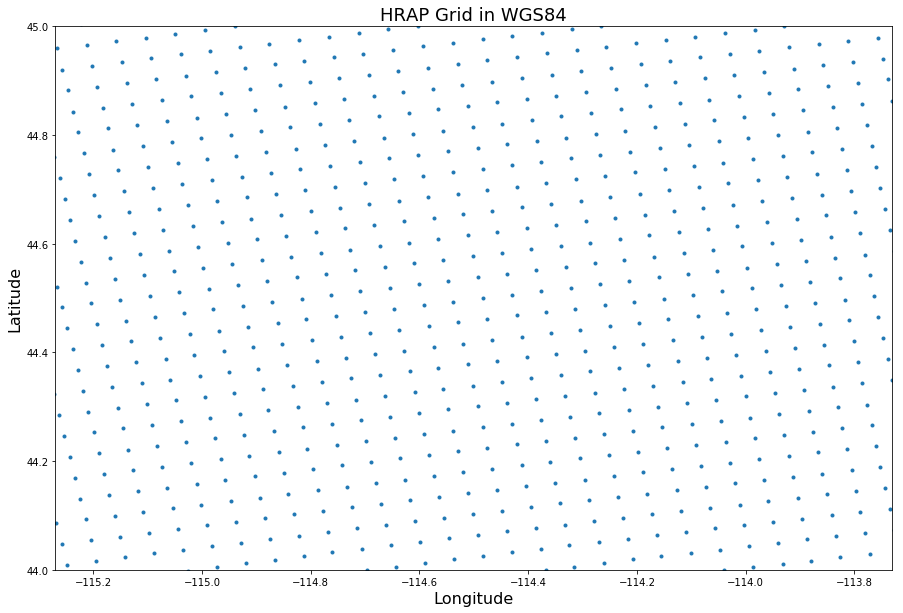

In [8]:
plt.figure(figsize=(15,10))
plt.plot(lonsWGS84,latsWGS84,'.',label='HRAP')
plt.axis('equal')
plt.xlim(-115,-114)
plt.ylim(44,45)
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('HRAP Grid in WGS84', fontsize = 18)

## Move to a projected grid

In [9]:
# +to_meter=4762.5
p3 = Proj('+proj=stere +lat_0=90 +lat_ts=60 +lon_0=-105 +k=1 +x_0=0 +y_0=0 +a=6371200 +b=6371200 +no_defs',
          preserve_units=True)

In [10]:
x,y = transform(p2,p3,lonsWGS84,latsWGS84) # reproject the HRAP grid to WGS84

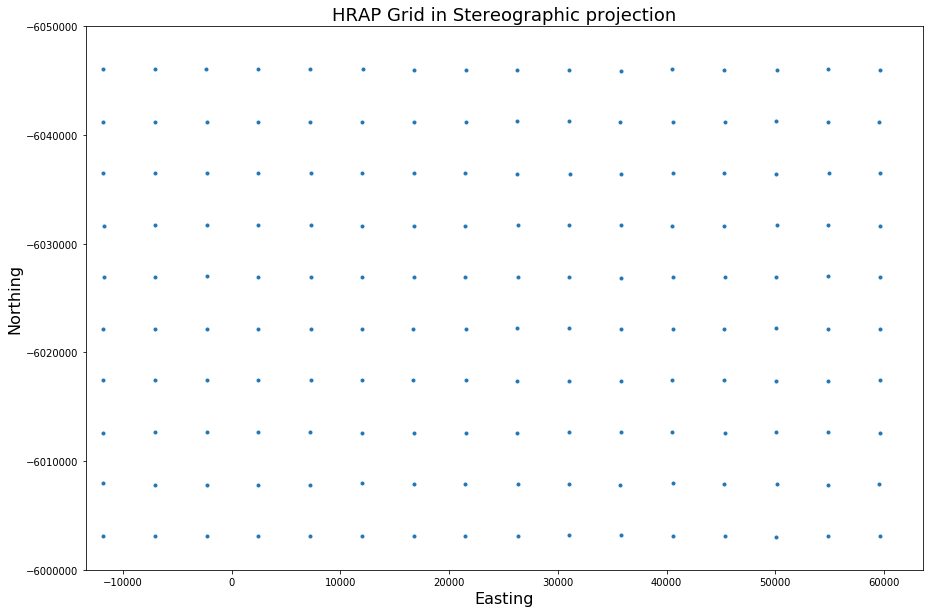

In [11]:
plt.figure(figsize=(15,10))
plt.plot(x,y,'.',label='HRAP')
plt.axis('equal')
plt.xlim(100,50000)
plt.ylim(-6000000,-6050000)
plt.xlabel('Easting', fontsize=16)
plt.ylabel('Northing', fontsize=16)
plt.title('HRAP Grid in Stereographic projection', fontsize = 18)

In [12]:
x[-1] - x[-2]

4643.3413071078248

In [13]:
x[1] - x[0]

4808.8484406499192

In [14]:
tmp = pd.DataFrame({'cell':cells,'x':x,'y':y})

In [15]:
tmp.to_csv('./data/hrap_x_y_stere.csv',index=False,header=True)

## Notes:

Plotting the X,Y data using Qgis it looks like removing the +to_meter field from the projection puts the data on grid that covers the US nicely and allows the dataset to be rasterized with a cell size of 4762.5, the raster was indexed using the cell number so that it will allow the manual re-mapping of the Stage IV data to the projected HRAP grid without too much of an issue.